In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import ROOT
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from root_numpy import root2array, testdata
import glob
from tqdm import tnrange
from physics import *
from constants import *
from main import *


np.set_printoptions(precision=8, suppress=True)
plt.rc('text', usetex=False)

my_cmap = cm.get_cmap('viridis')
my_cmap.set_over('w')
color_map = my_cmap

df = pd.DataFrame()
num_bins = 300
fig_size = (16, 9)

Welcome to ROOTaaS 6.06/08


In [2]:
#file_name = '/Users/tylern/data/inputFiles/v3/skim/r22855_00_skim.root'
#file_h10 = ROOT.TFile.Open(file_name, 'read')


directory = '/Users/tylern/data/inputFiles/v3/skim/*'
chain_h10 = ROOT.TChain('h10')
chain_h10.Add(directory)

42

In [3]:
%%time
Q2 = np.array([])
Q2_1 = np.array([])
W = np.array([])
W_1 = np.array([])

for _e in chain_h10:
    if _e.id[0] is ID['ELECTRON']:
        e_mu_p = fourvec(_e.p[0],_e.cx[0],_e.cy[0],_e.cz[0],mass['ELECTRON'])
        Q2 = append(Q2,Q2_calc(e_mu,e_mu_p))
        Q2_1 = append(Q2_1,_e.Q2)
        W = append(W,W_calc(e_mu,e_mu_p))
        W_1 = append(W_1,_e.W)
        
Wp = W-W_1
Q2p = Q2-Q2_1

CPU times: user 3h 40min 20s, sys: 2h 59min 11s, total: 6h 39min 32s
Wall time: 15h 39min 9s


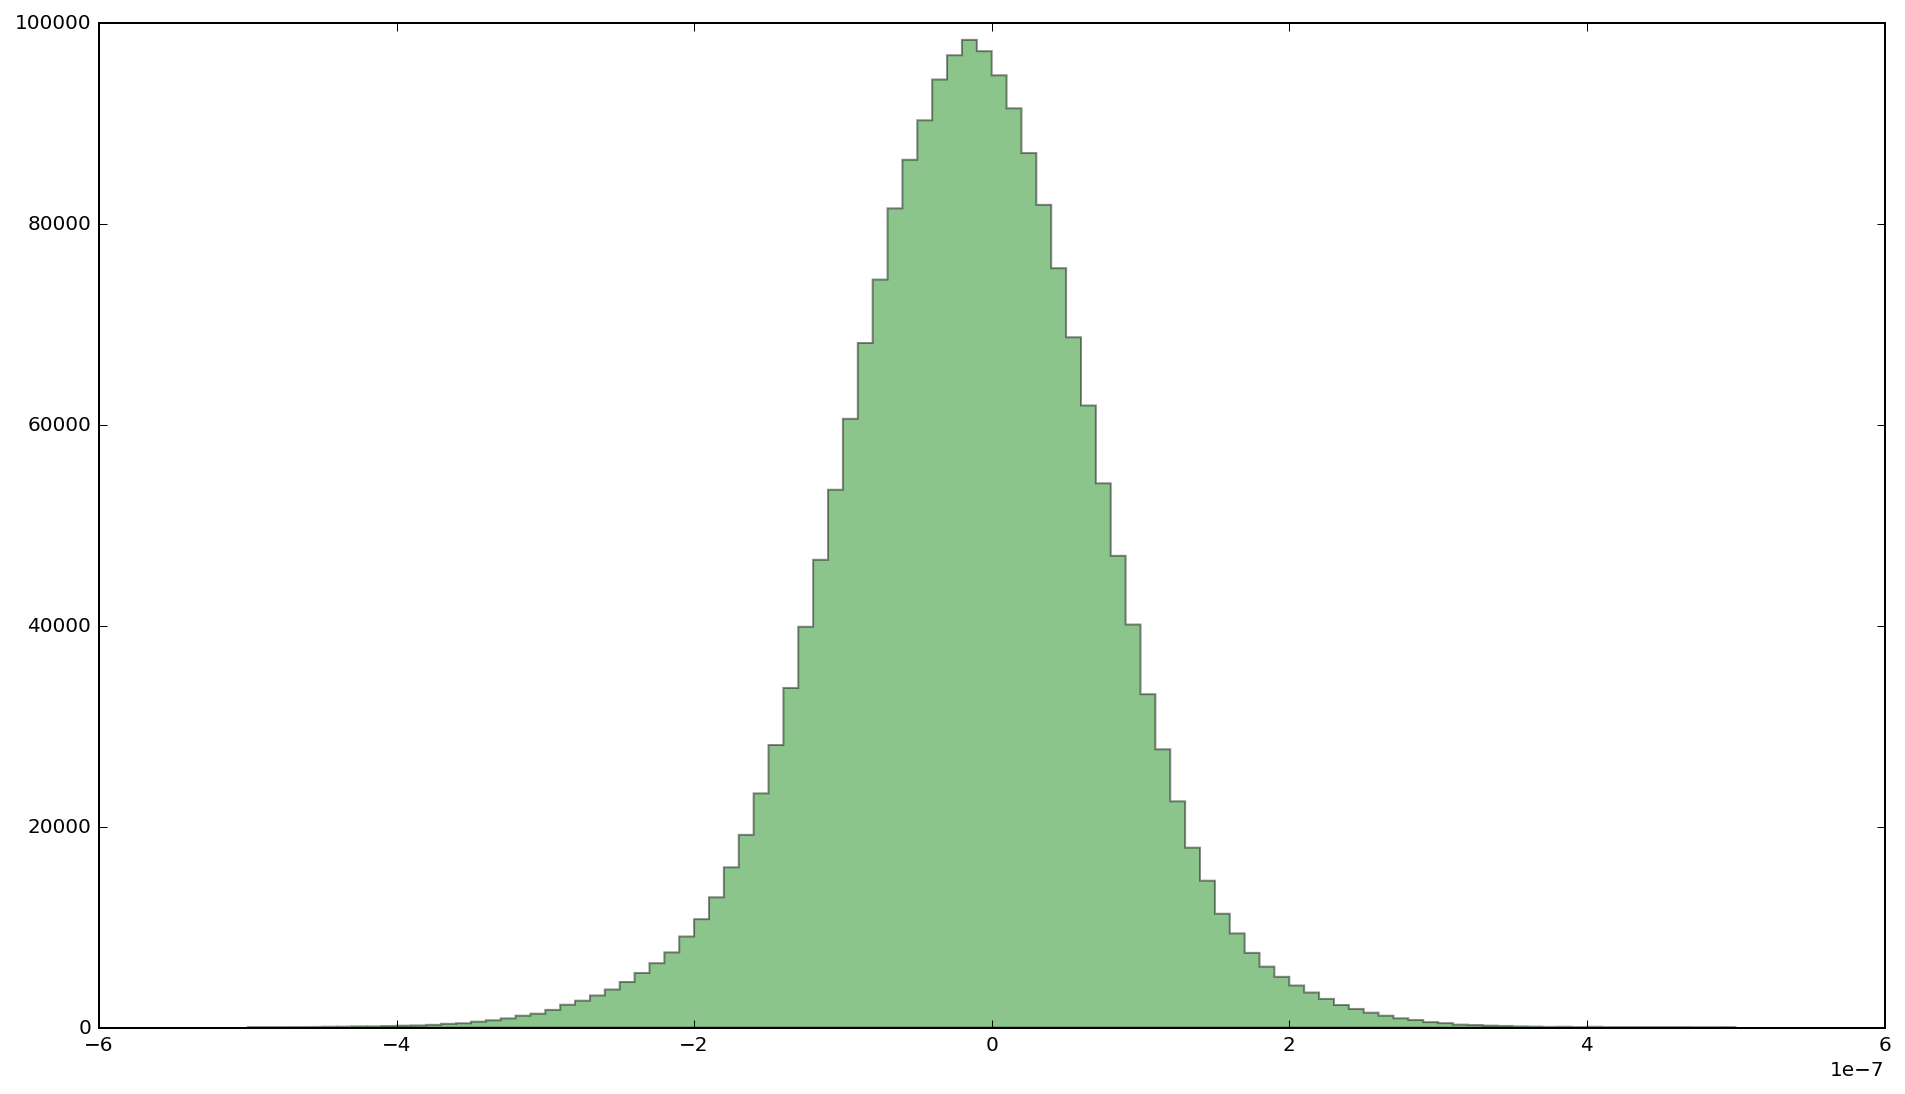

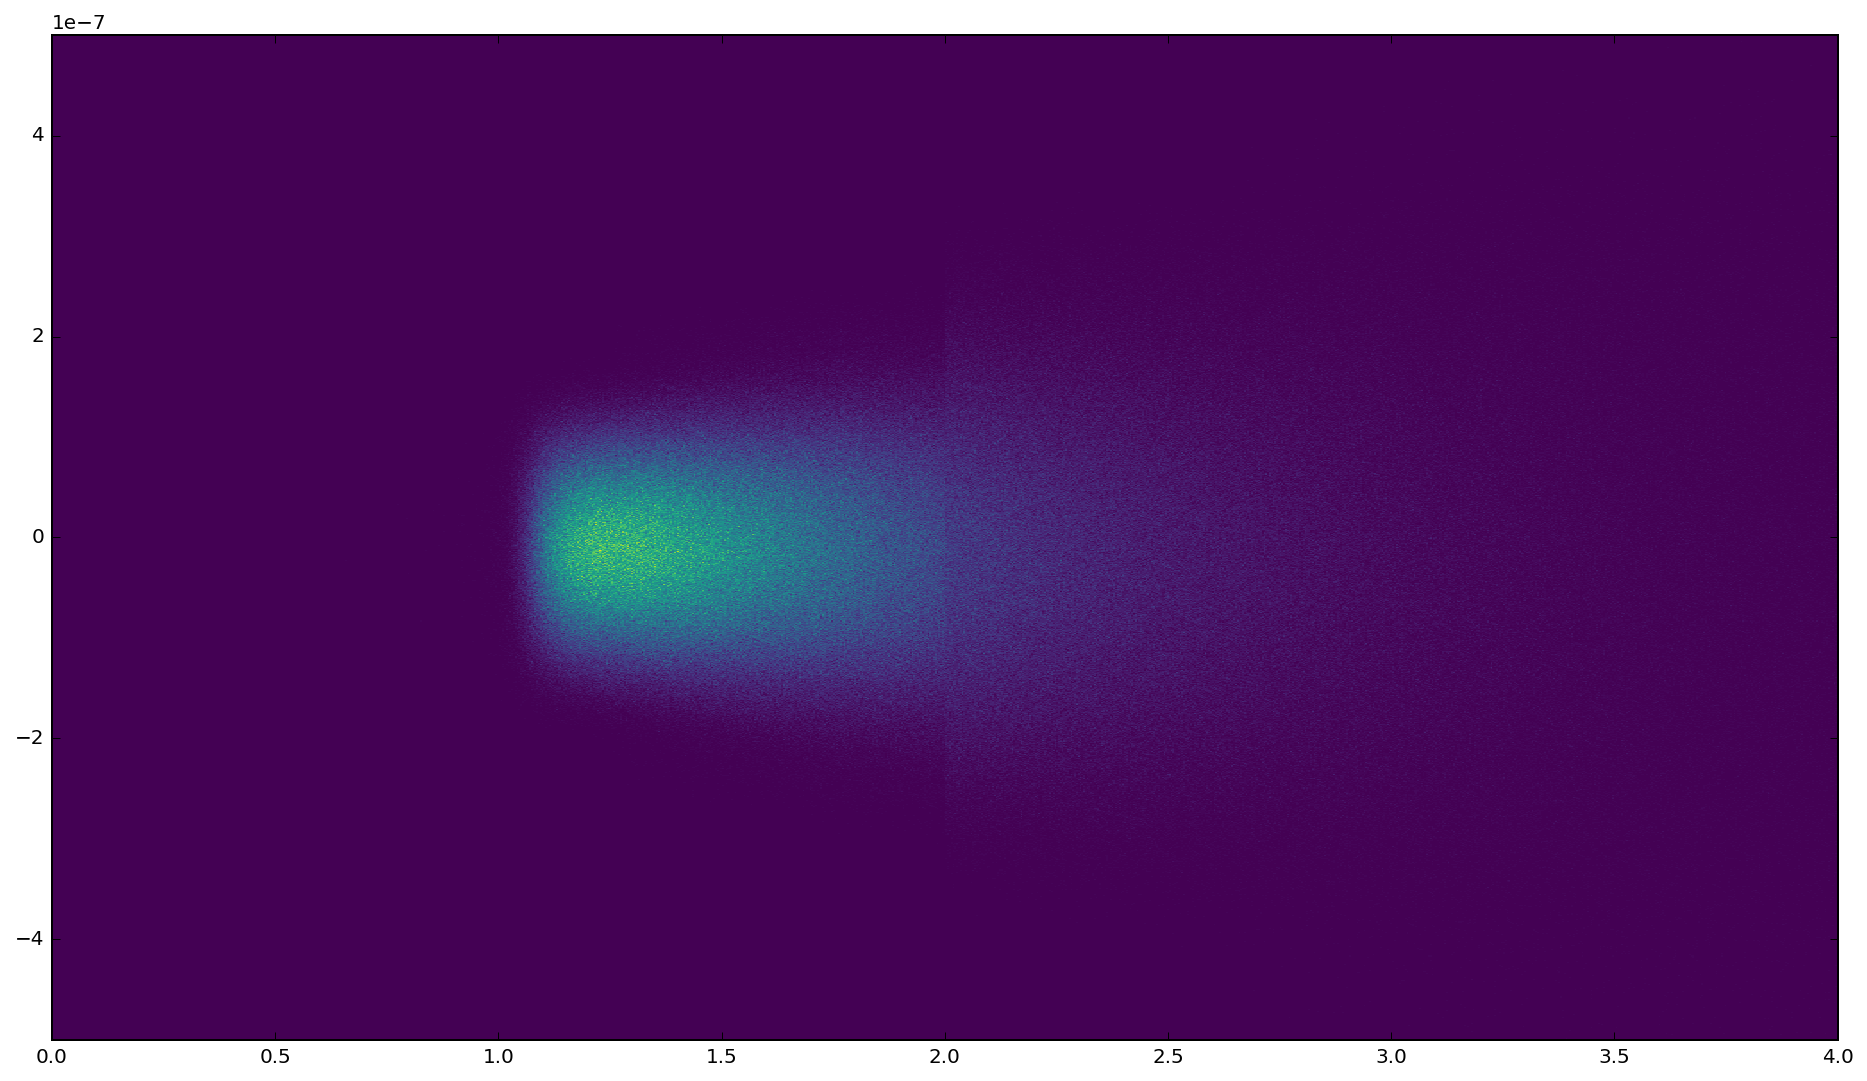

In [4]:
fig = plt.figure(num=None, figsize=fig_size, dpi=200, facecolor='w', edgecolor='k')
plt.hist(Q2-Q2_1, bins=100, range=[-5E-7,5E-7], histtype=u'stepfilled', facecolor='g', alpha=0.45)
plt.show()

fig = plt.figure(num=None, figsize=fig_size, dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(Q2,Q2-Q2_1,bins=1000,range=[[0,4],[-5E-7,5E-7]],cmap=color_map)
plt.show()

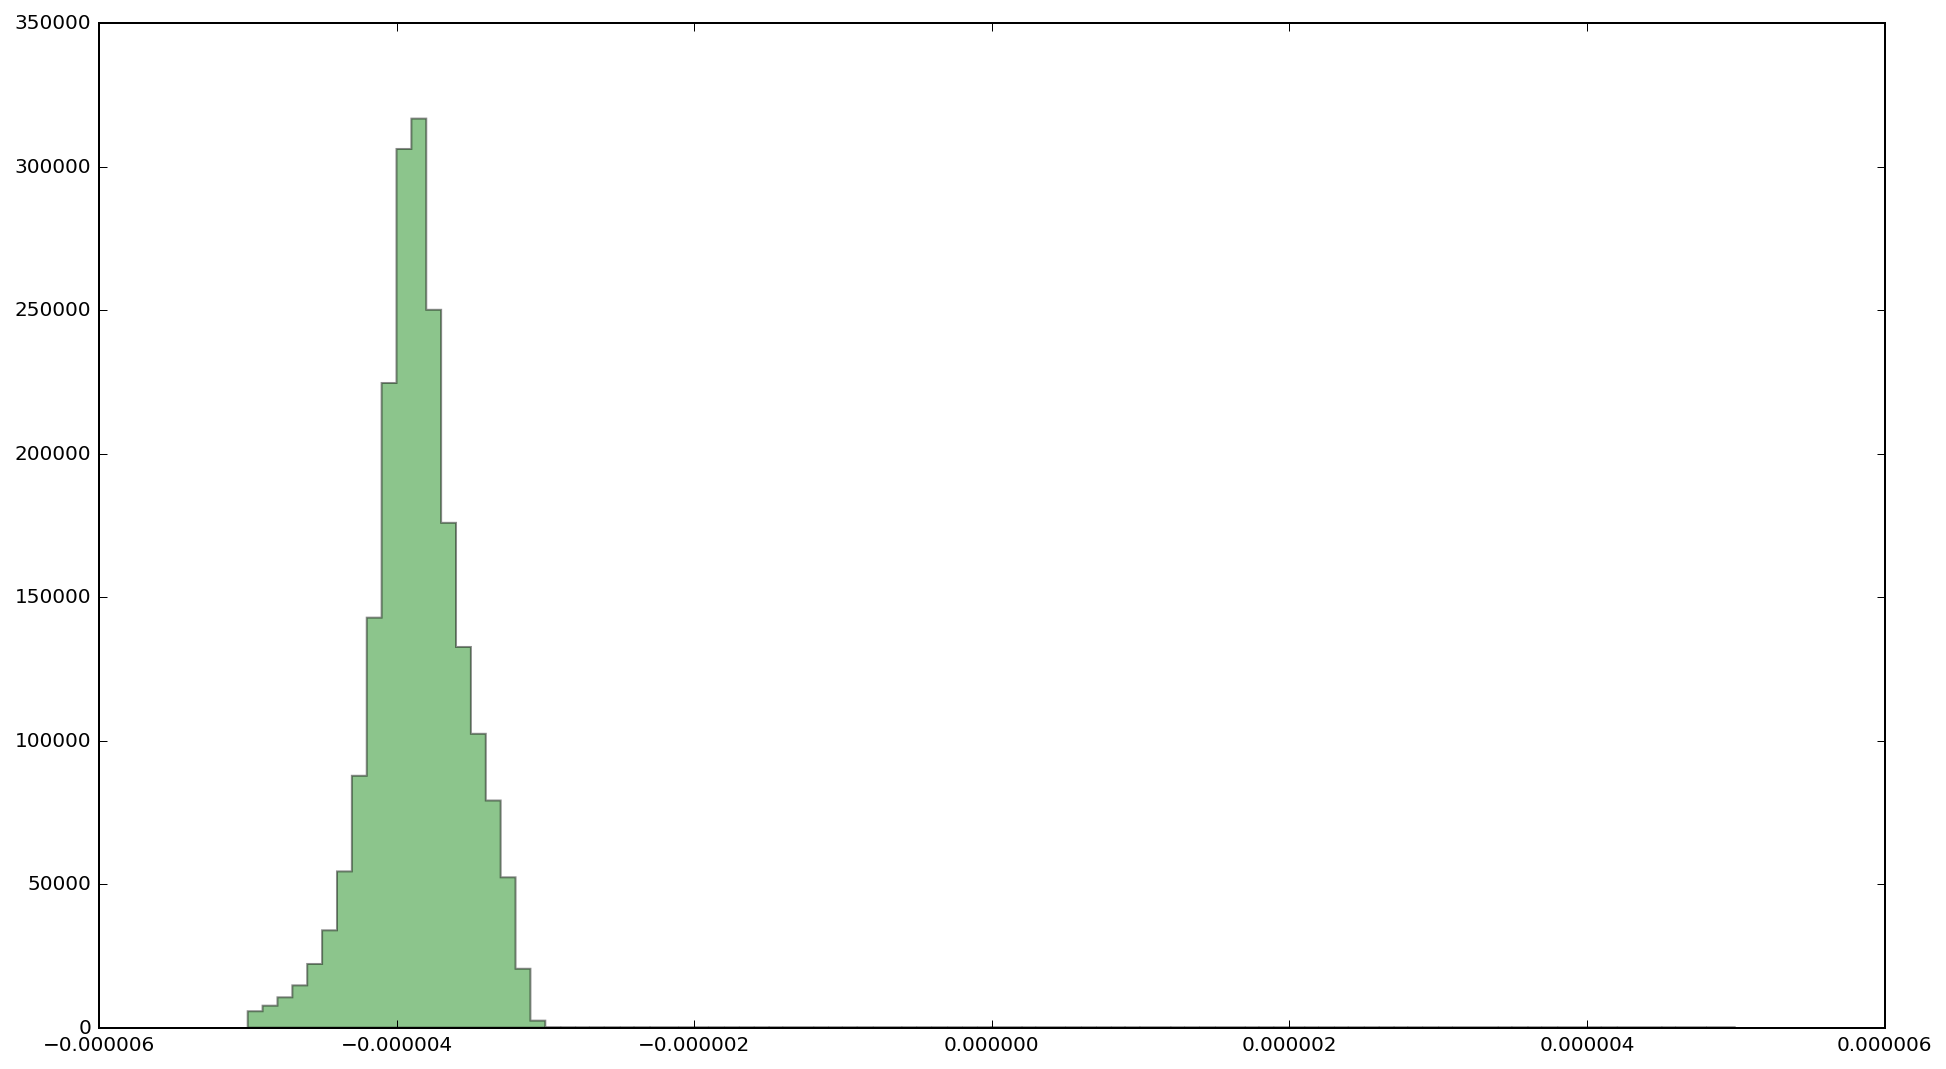

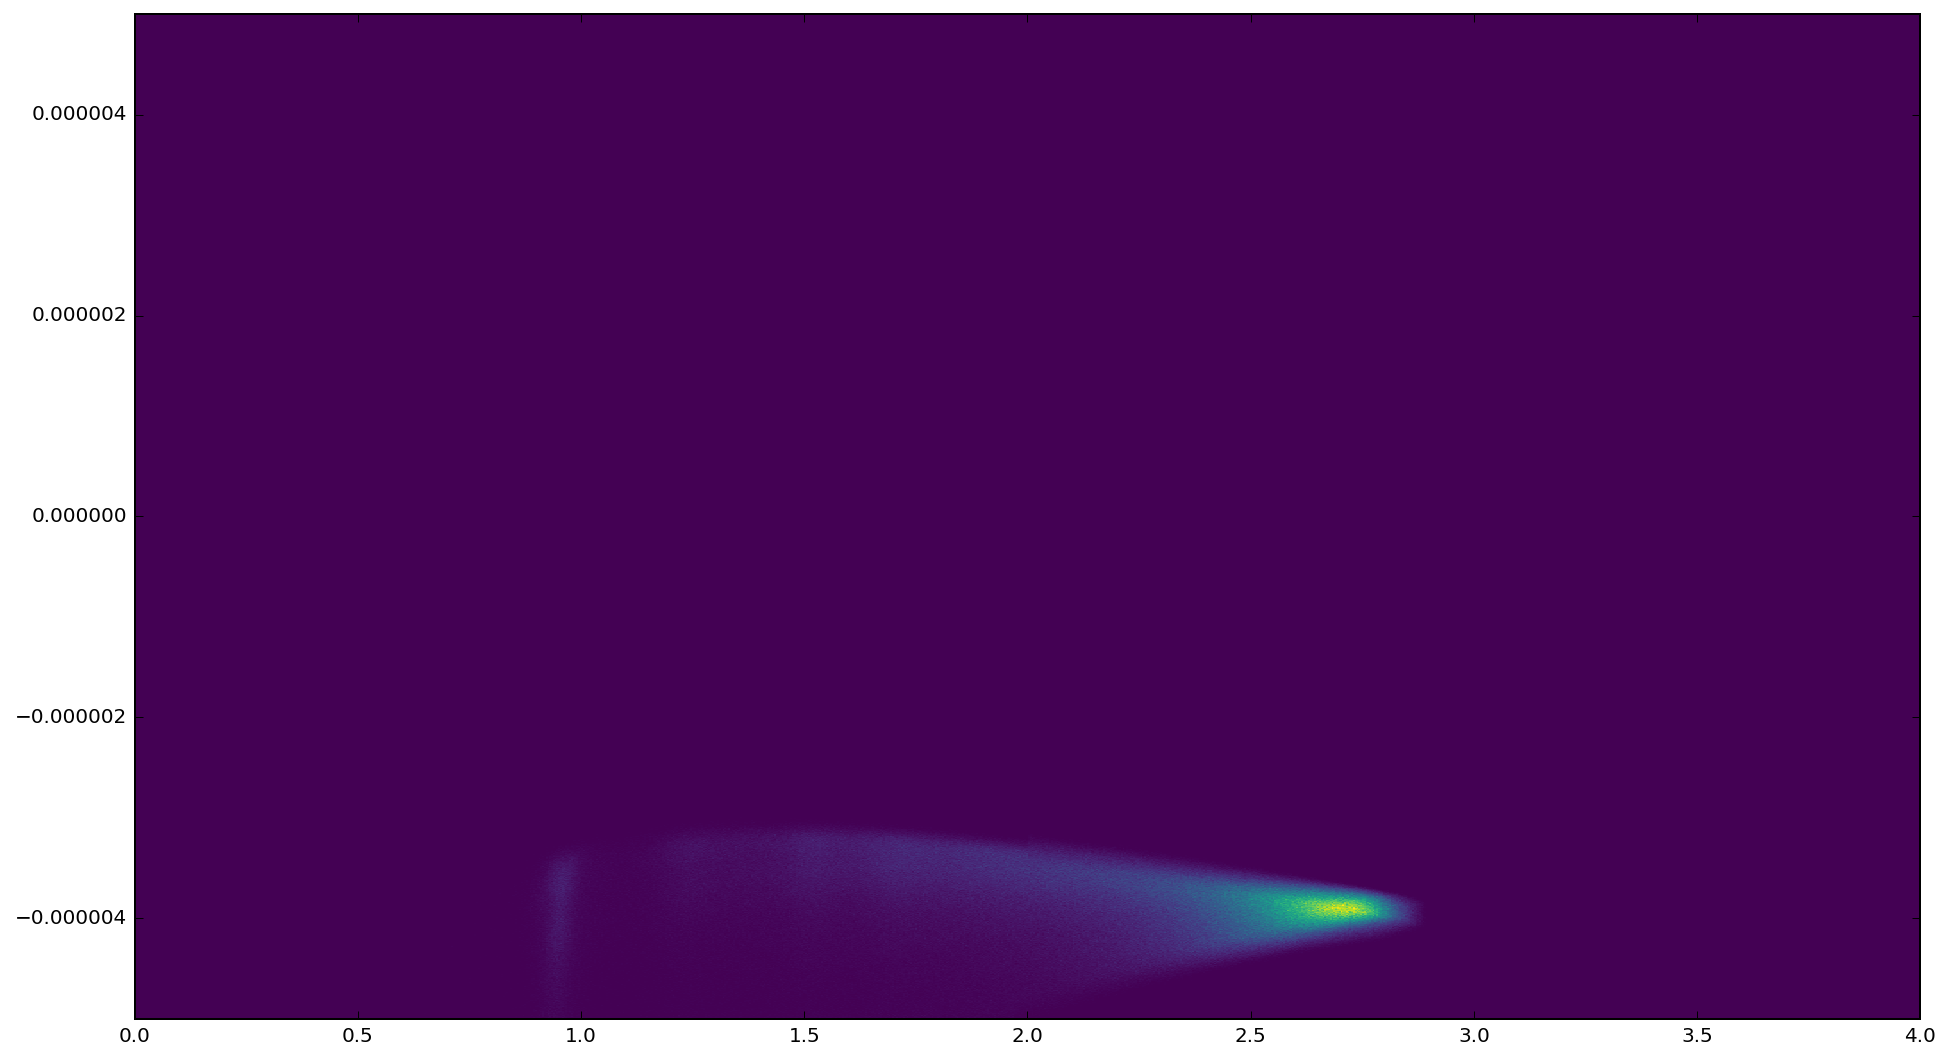

In [5]:
fig = plt.figure(num=None, figsize=fig_size, dpi=200, facecolor='w', edgecolor='k')
plt.hist(Wp, bins=100, range=[-5E-6,5E-6], histtype=u'stepfilled', facecolor='g', alpha=0.45)
plt.show()

fig = plt.figure(num=None, figsize=fig_size, dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(W,Wp,bins=1000,range=[[0,4],[-5E-6,5E-6]],cmap=color_map)
plt.show()

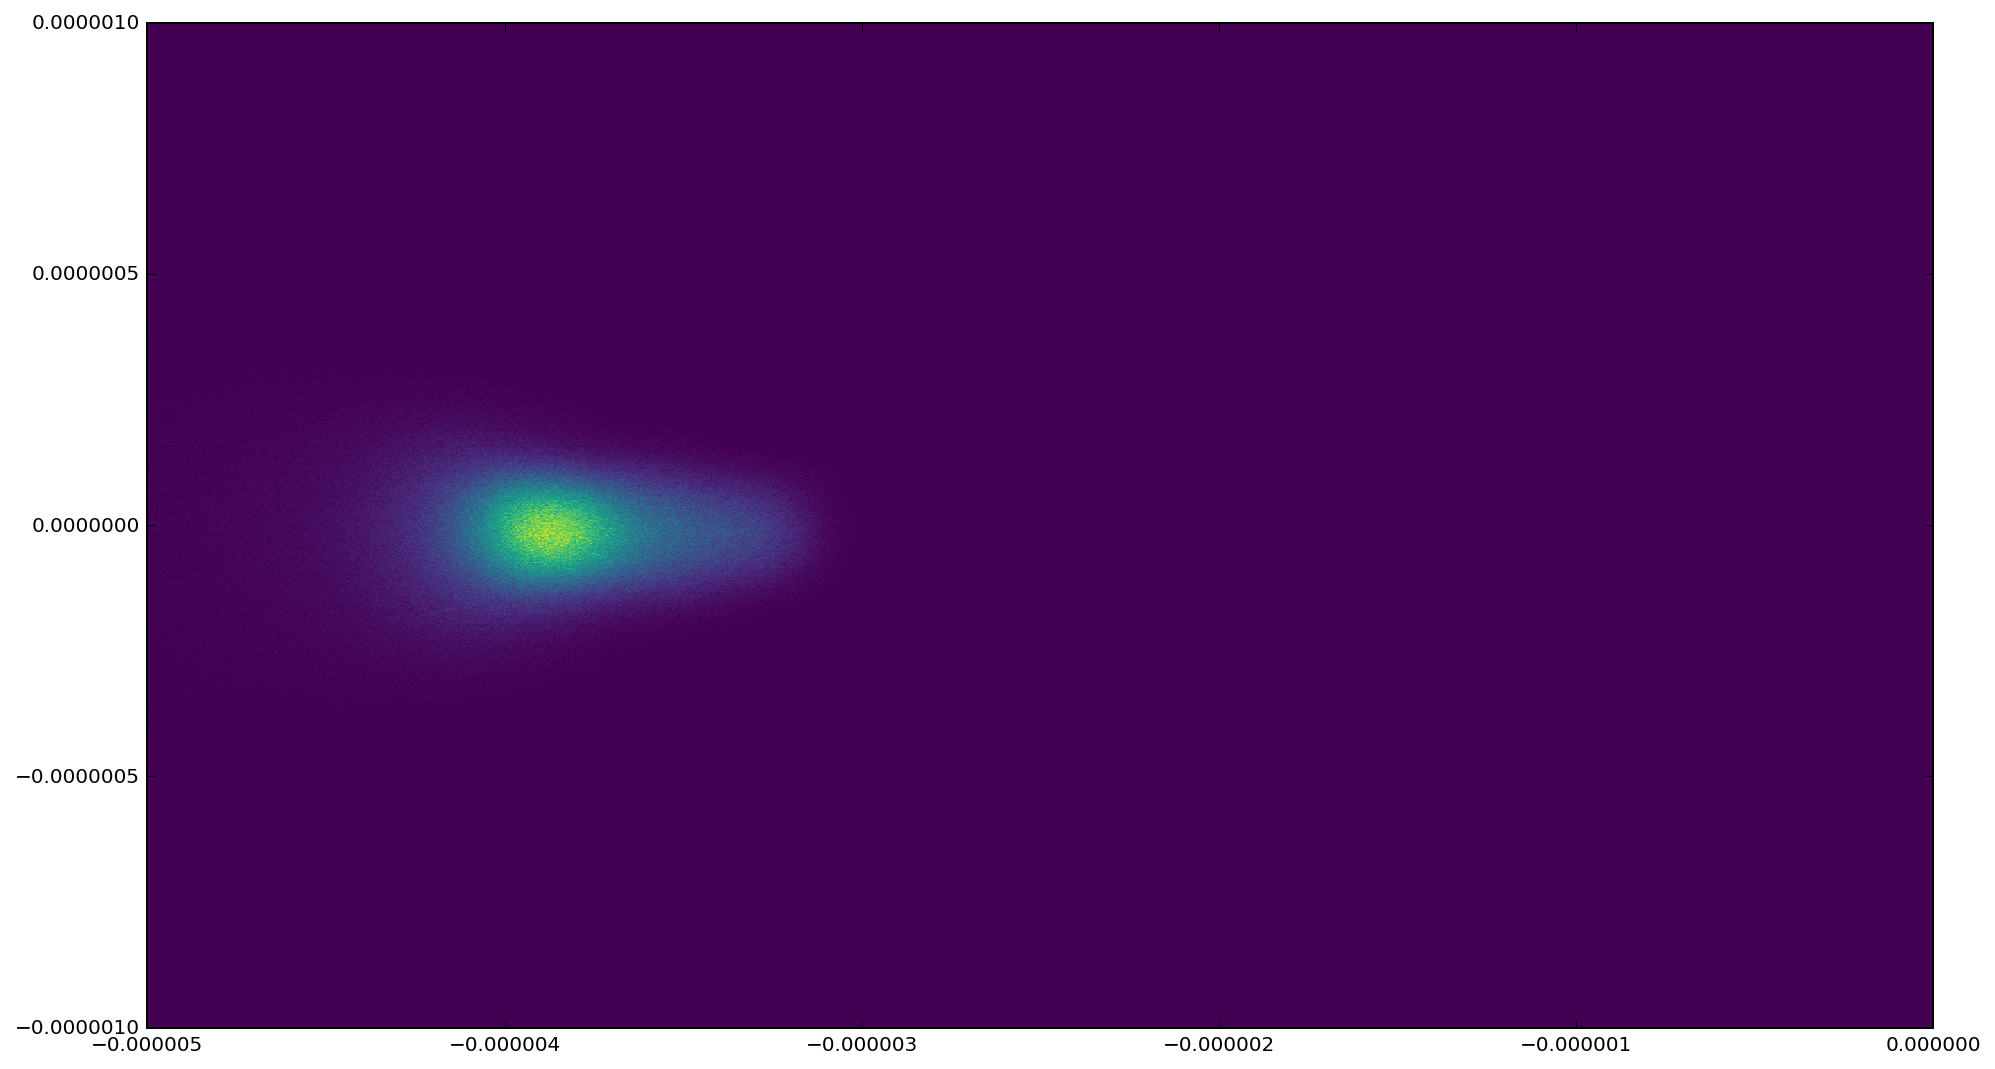

In [6]:
fig = plt.figure(num=None, figsize=fig_size, dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(Wp,Q2p,bins=1000,range=[[-5E-6,0],[-1E-6,1E-6]],cmap=color_map)
plt.show()

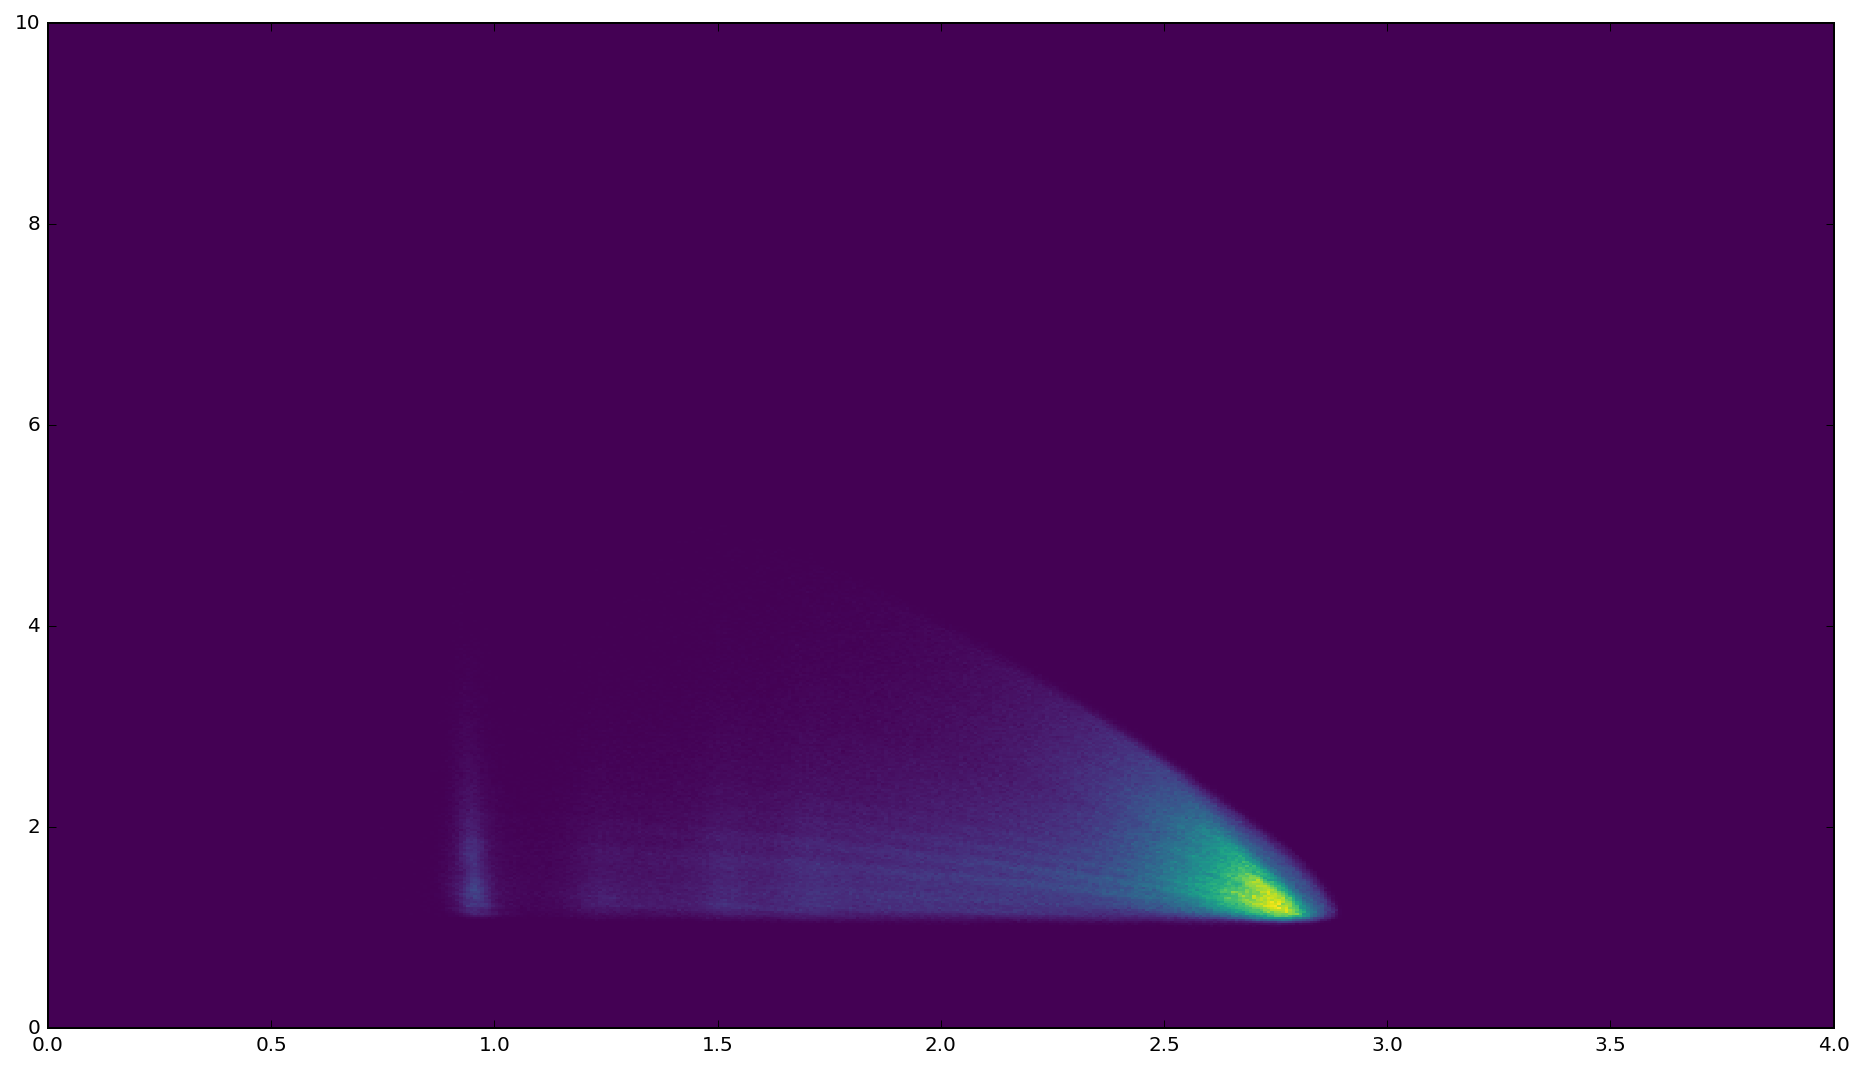

In [7]:
fig = plt.figure(num=None, figsize=fig_size, dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(W,Q2,bins=500,range=[[0,4],[0,10]],cmap=color_map)
plt.show()

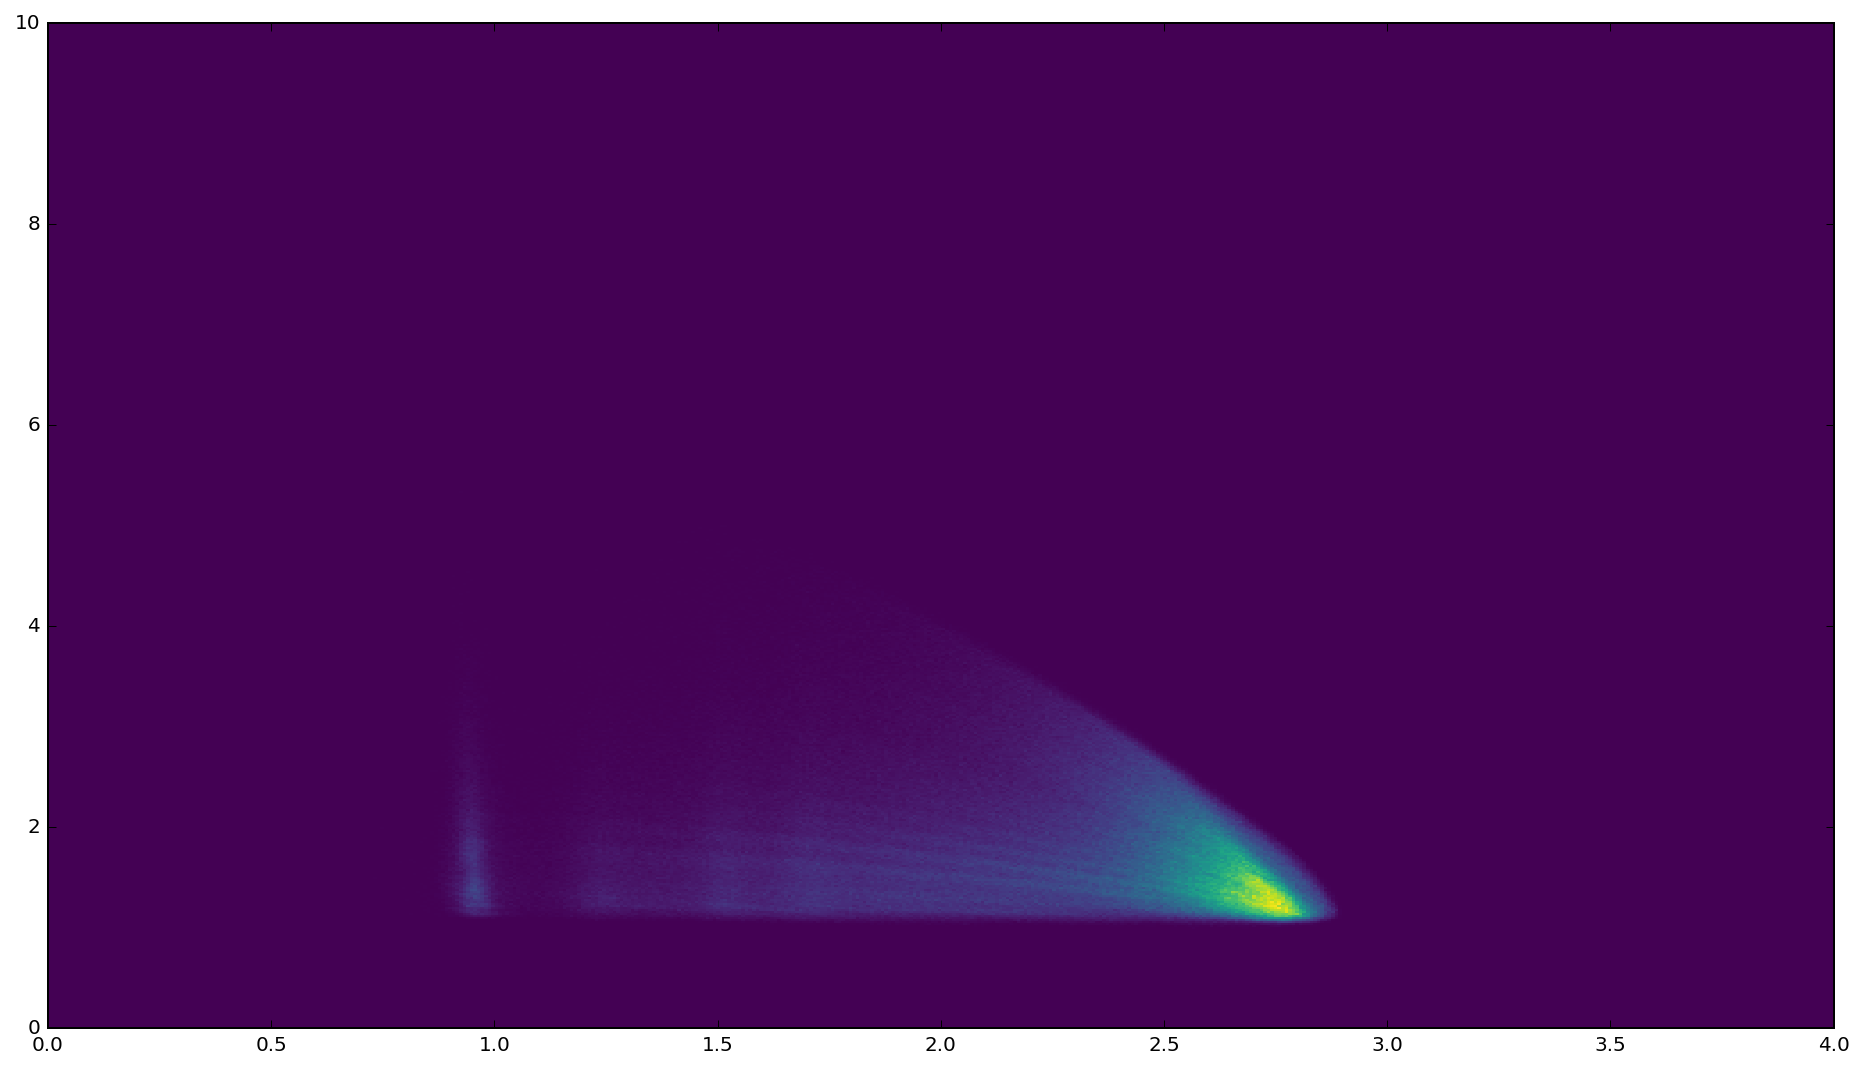

In [8]:
fig = plt.figure(num=None, figsize=fig_size, dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(W_1,Q2_1,bins=500,range=[[0,4],[0,10]],cmap=color_map)
plt.show()